In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from src import image_selection
from src.Tile import Tile

# Filtering by aspect ratio

I am assuming that files that I am interested in - nice tiles with nothing else - are square. Of course, this filerting step is not enough on it's own, but it filters out some garbage.

There are chances that we will filter out some good images, but that's the risk I am willing to take.

In [5]:
folder_list = [
    'dataset/google/azulejo',
    'dataset/google/portuguese tiles',
    'dataset/bing/azulejo',
    'dataset/bing/hand painted tile',
    'dataset/bing/handmade tile',
    'dataset/bing/portuguese tile'
]

Working on dataset/google/azulejo folder.


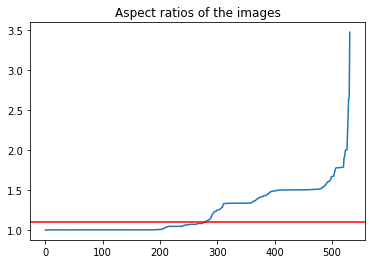

Random sample of rectangular files - they didn't make it.


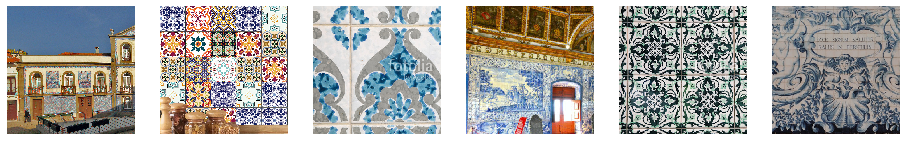

Random sample of square-ish files - they made it!


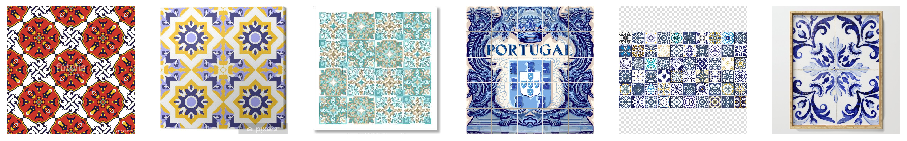

Total files: 532, out of them square-ish: 279.



Working on dataset/google/portuguese tiles folder.


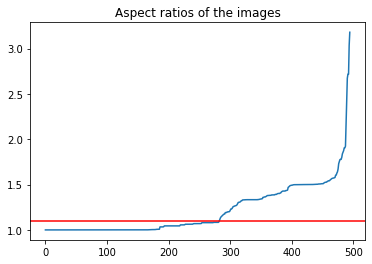

Random sample of rectangular files - they didn't make it.


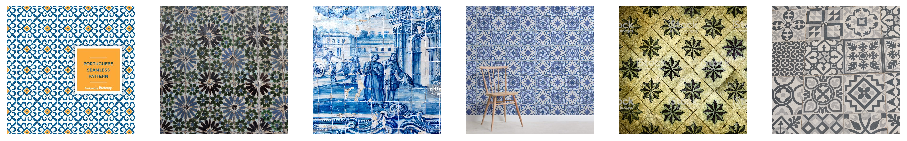

Random sample of square-ish files - they made it!


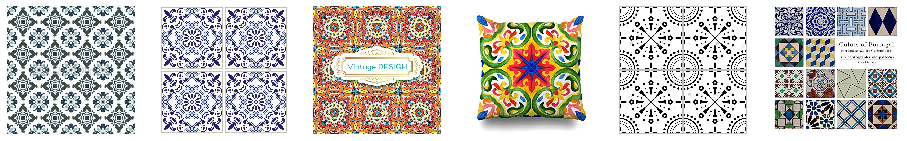

Total files: 495, out of them square-ish: 283.



Working on dataset/bing/azulejo folder.


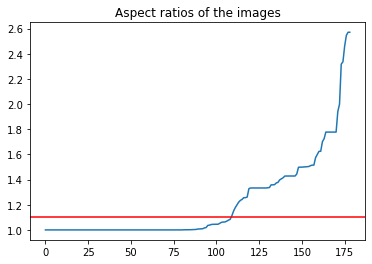

Random sample of rectangular files - they didn't make it.


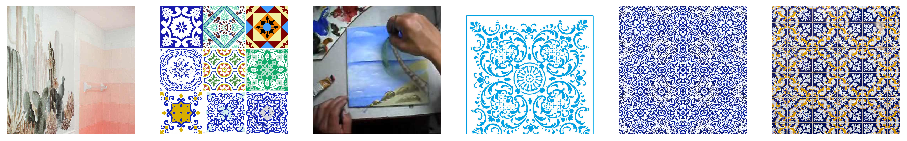

Random sample of square-ish files - they made it!


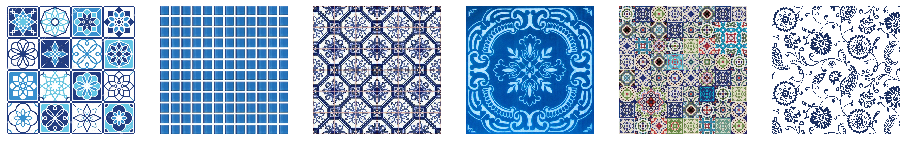

Total files: 179, out of them square-ish: 109.



Working on dataset/bing/hand painted tile folder.


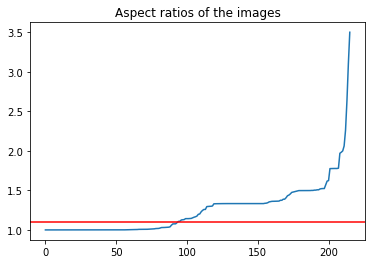

Random sample of rectangular files - they didn't make it.


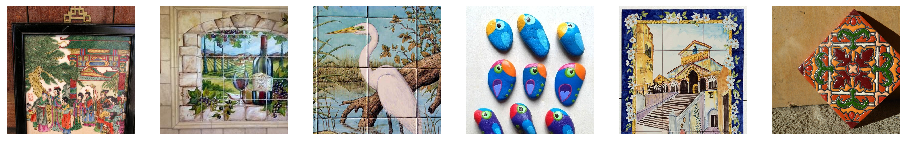

Random sample of square-ish files - they made it!


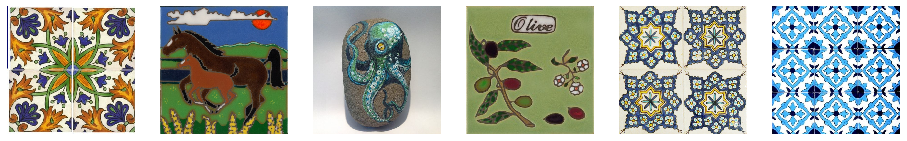

Total files: 216, out of them square-ish: 94.



Working on dataset/bing/handmade tile folder.


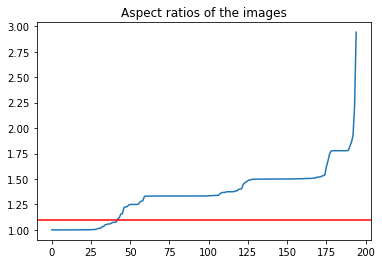

Random sample of rectangular files - they didn't make it.


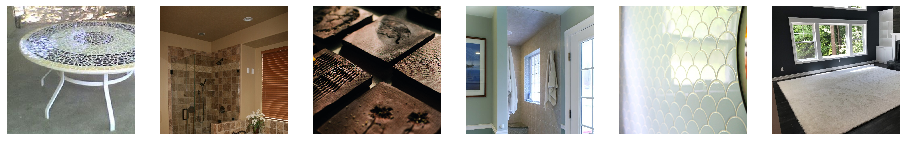

Random sample of square-ish files - they made it!


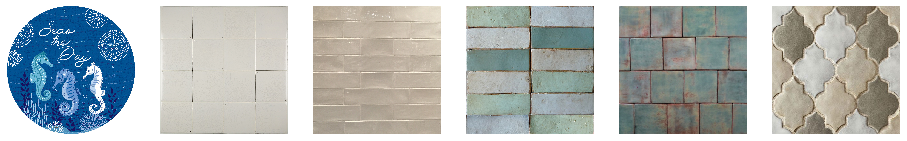

Total files: 195, out of them square-ish: 42.



Working on dataset/bing/portuguese tile folder.


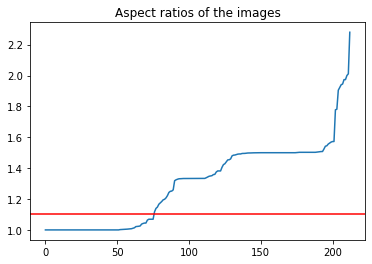

Random sample of rectangular files - they didn't make it.


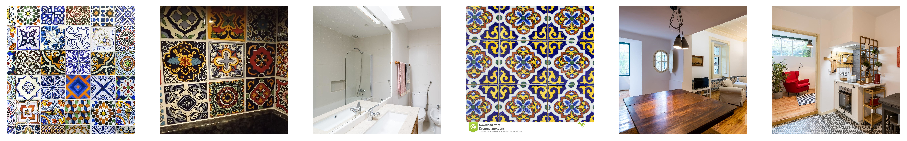

Random sample of square-ish files - they made it!


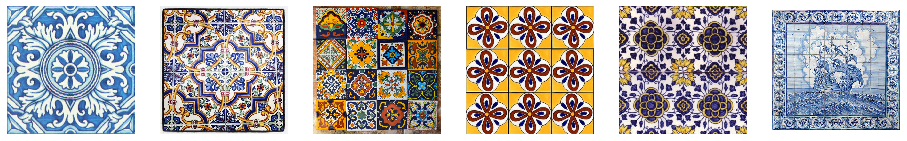

Total files: 213, out of them square-ish: 76.





In [6]:
plot_sample = 6

for folder in folder_list:
    print('Working on {} folder.'.format(folder))
    files = [_ for _ in os.listdir(folder)  if _.endswith(".jpg")]
    sample_square = image_selection.get_square_imgs(files, folder)
    sample_rectangular = [_ for _ in files if _ not in sample_square]
    print('Random sample of rectangular files - they didn\'t make it.')
    Tile.plot_grid(
        [
            Tile(cv2.imread('{}/{}'.format(folder, img_file))[...,::-1]) 
            for img_file in
            np.random.choice(sample_rectangular, min(plot_sample, len(sample_rectangular)), replace=False)
        ],
        cols=6
    )
    
    print('Random sample of square-ish files - they made it!')
    Tile.plot_grid(
        [
            Tile(cv2.imread('{}/{}'.format(folder, img_file))[...,::-1]) 
            for img_file in
            np.random.choice(sample_square, min(plot_sample, len(sample_square)), replace=False)
        ],
        cols=6
    )
    
    print('Total files: {}, out of them square-ish: {}.'.format(len(files), len(sample_square)))
    
    with open('lists/square_{}.txt'.format(folder.replace('/', '-')), 'w') as filehandle:
        for filename in sample_square:
            filehandle.write('%s\n' % filename)
    print('\n\n')